In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
merge_data = pd.read_csv('/content/drive/MyDrive/Covid 19 News Classification/Data/raw_data_v2.csv')

In [8]:
merge_data.head(2)

,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...


# Uni Gram Approach

In [9]:
# Feature Extraction
tfidf = TfidfVectorizer(sublinear_tf=True,
                            analyzer='word',
                            ngram_range=(1,1),
                            max_features=5444)

In [10]:
X = tfidf.fit_transform(merge_data['covid_lemmatized'])

In [11]:
Y = merge_data['Covid']

In [12]:
smk_biagram = SMOTETomek(random_state=42)
X_v1,Y_v1=smk_biagram.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_v1)))

Original dataset shape Counter({1: 3245, 0: 827})
Resampled dataset shape Counter({1: 3242, 0: 3242})


In [15]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(X_v1,Y_v1,test_size = 0.20, random_state= True)

In [17]:
# Decission Tree Classifier
decession_tree = DecisionTreeClassifier()
decession_tree.fit(x_train,y_train)
y_pred_decession_tree = decession_tree.predict(x_test)
print("Decission Tree Classifier")
print(classification_report(y_test, y_pred_decession_tree))

# Random Forest  Classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest  Classifier")
print(classification_report(y_test, y_pred_random_forest))


# KNN  Algo
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_pred_knn_classifier = knn_classifier.predict(x_test)
print("KNN  Algo")
print(classification_report(y_test, y_pred_knn_classifier))


# Multinomial Naive Bias
mulNB = MultinomialNB()
mulNB.fit(x_train,y_train)
y_pred_mulNB = mulNB.predict(x_test)
print("Multinomial Naive Bias")
print(classification_report(y_test, y_pred_mulNB))


Decission Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       648
           1       0.93      0.93      0.93       649

    accuracy                           0.93      1297
   macro avg       0.93      0.93      0.93      1297
weighted avg       0.93      0.93      0.93      1297

Random Forest  Classifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       648
           1       0.98      0.96      0.97       649

    accuracy                           0.97      1297
   macro avg       0.97      0.97      0.97      1297
weighted avg       0.97      0.97      0.97      1297

KNN  Algo
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       648
           1       1.00      0.38      0.55       649

    accuracy                           0.69      1297
   macro avg       0.81      0.69      0.65      1297
weighted avg

In [23]:
# Gradient bossting
gradient_bossting = GradientBoostingClassifier(random_state=3)
gradient_bossting.fit(x_train,y_train)
y_pred_gradientbossting = gradient_bossting.predict(x_test)
print("GradientBosting  Algo")
print(classification_report(y_test, y_pred_gradientbossting))


# SVM
svm_class = svm.SVC(kernel='poly',probability=True)
svm_class.fit(x_train,y_train)
y_pred_svm = svm_class.predict(x_test)
print("SVM  Algo")
print(classification_report(y_test, y_pred_svm))


# Logistic Regressor
logis_reg =LogisticRegression()
logis_reg.fit(x_train,y_train)
y_pred_log = logis_reg.predict(x_test)
print("Logistic Reg  Algo")
print(classification_report(y_test, y_pred_log))

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       648
           1       0.98      0.83      0.90       649

    accuracy                           0.91      1297
   macro avg       0.92      0.91      0.91      1297
weighted avg       0.92      0.91      0.91      1297

SVM  Algo
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       648
           1       0.98      0.99      0.99       649

    accuracy                           0.99      1297
   macro avg       0.99      0.99      0.99      1297
weighted avg       0.99      0.99      0.99      1297

Logistic Reg  Algo
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       648
           1       0.99      0.92      0.96       649

    accuracy                           0.96      1297
   macro avg       0.96      0.96      0.96      1297
weighted avg       0.96

In [ ]:
X1 = np.array(X_v1)
Y1 = np.array(Y_v1)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10,random_state=None)
folds.get_n_splits(X_v1,Y_v1)

10

In [ ]:
accurecy = []
for train_index, test_index in folds.split(X_v1,Y_v1):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_v1[train_index], X_v1[test_index], Y_v1[train_index], Y_v1[test_index]
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train,y_train)
    prediction = random_forest.predict(X_test)
    score = accuracy_score(prediction,y_test)
    accurecy.append(score)    

Train Index:  [  6558   6559   6560 ... 105169 105170 105171] 

Test Index:  [    0     1     2 ... 57842 57843 57844]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [ 6558  6559  6560 ... 63101 63102 63103]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [11817 11818 11819 ... 68360 68361 68362]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [17075 17076 17077 ... 73619 73620 73621]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [22333 22334 22335 ... 78878 78879 78880]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [27591 27592 27593 ... 84137 84138 84139]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [32849 32850 32851 ... 89395 89396 89397]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [38108 38109 38110 ... 94653 94654 94655]
Train Index:  [     0      1      2 ... 105169 1

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5258
           1       0.95      0.95      0.95      5259

    accuracy                           0.95     10517
   macro avg       0.95      0.95      0.95     10517
weighted avg       0.95      0.95      0.95     10517



In [ ]:
np.array(accurecy).mean()

0.900717878096407

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import metrics

In [25]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_v1,Y_v1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

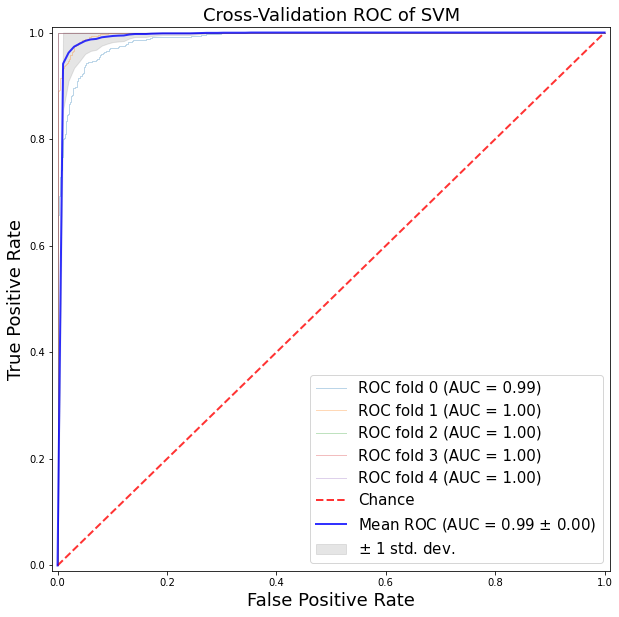

In [28]:
# Classification and ROC analysis
classifier = SVC(probability=True)
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = classifier.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of SVM',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()